# 1083 Albumin Analysis with Updated Dataset

### By: Ian Weimer

## Imports

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from scipy import stats
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer
import scipy.stats
pd.set_option('display.max_columns', None)
import phik
from phik import resources, report

## Preprocessing and Exploratory Data Analysis 

## Load Albumin Data

In [2]:
pwd

'C:\\Users\\Iweimer\\Desktop\\BB_Git\\1083-albumin-data-exploration\\ML\\D89_Cohort'

In [4]:
df_alb = pd.read_csv('D89_cohort.csv', index_col=0)

In [5]:
df_alb.head()

personid                           encounterid  \
0  252f698a-0fc6-48a0-835c-c44e9825392c  4570dfc8-5ac7-462f-a7c8-e3298d2216b0   
1  6272bece-1b31-4e41-9a1b-f04ee187f3f3  299349b3-76b7-45c6-b0ca-90da898a8d80   
2  a16e3708-02eb-432a-bf8a-34c098b1ff56  3b8c3ea4-897f-49bc-b644-c1c3df09f9af   
3  e2756ffe-6f30-4e89-85eb-cdd121701999  aef92409-1dd6-4a92-9916-df20ce6c8b4b   
4  e301aa6c-4068-4e0a-9b5a-4cc73c016add  341bf1e9-76ef-4a00-ae50-24066b4d2273   

            index_date  zip_code bed_size  ICU    LOS_days  90_day_mortality  \
0  2020-04-21 19:46:00         0  300-499    0  263.475000                 0   
1  2020-10-05 23:51:00         8   >=1000    0    3.954861                 0   
2  2018-01-19 16:07:00         6  200-299    0   54.130556                 0   
3  2018-05-23 14:22:00         0  300-499    0  231.265972                 0   
4  2020-07-20 03:38:00         0  300-499    0  182.711806                 0   

   90_day_readmission  days_until_readmission  hospital_free_days  Cirrhosis  \
0                 0.0                     NaN                   0          1   
1                 0.0              202.872222                  85          0   
2                 0.0                     NaN                   1          0   
3                 0.0                     NaN                   0          0   
4                 0.0              186.581944                   0          1   

   CCI  qSOFA  MELD  albumin_timing  SEWS  tenant  
0    4      1   NaN               2     2      72  
1    0      0   9.0               0     0      63  
2    2      2   NaN               0     4      44  
3    2      1   7.0               0     1      72  
4    6      1   9.0               0     4      72

In [6]:
df_alb.shape

(255, 18)

In [7]:
print('Number of unique patients:', df_alb.personid.nunique())
print('Number of unique encounters:', df_alb.encounterid.nunique())

Number of unique patients: 255
Number of unique encounters: 255


In [8]:
df_alb.isnull().sum()

personid                    0
encounterid                 0
index_date                  0
zip_code                    0
bed_size                    0
ICU                         0
LOS_days                    0
90_day_mortality            0
90_day_readmission         63
days_until_readmission    111
hospital_free_days          0
Cirrhosis                   0
CCI                         0
qSOFA                       0
MELD                      102
albumin_timing              0
SEWS                        0
tenant                      0
dtype: int64

## Load Non Albumin Data

In [9]:
df_no_alb = pd.read_csv('D89_control_cohort.csv', index_col=0)

In [10]:
df_no_alb.head()

personid                           encounterid  \
0  05da2a2b-4f2e-484e-ba64-d66fc910c2fb  b720863a-f901-419a-81dd-f73a991d9a12   
1  08114e2b-bed1-468e-93e1-18b6c7ae89bc  eb24a8a4-1403-42ab-83e0-28a2444aac89   
2  198b30d9-ef27-4eae-b3ee-ce419481875f  e8883161-e8be-4c89-a735-d414ffab4221   
3  1b5bb2e4-9ad7-4e32-b9a7-9e50b93df337  85d8b466-46ac-411e-a942-843e2e5889e6   
4  1d8a4758-3971-4d93-aa61-87770498a56a  e771a261-2d9b-4bdd-a73a-c186805ee681   

            index_date  zip_code bed_size  ICU  LOS_days  90_day_mortality  \
0  2015-10-16 11:59:00         2  300-499    0  0.666667                 0   
1  2021-07-26 14:49:00         0  300-499    0  0.549294                 0   
2  2015-10-01 16:44:00         1  500-999    0  1.469433                 0   
3  2017-02-16 17:32:16         1  500-999    0  2.099815                 0   
4  2016-08-08 14:05:42         1  500-999    0  1.579363                 0   

   90_day_readmission  days_until_readmission  hospital_free_days  Cirrhosis  \
0                 1.0               66.306250                  10          0   
1                 0.0                     NaN                  32          0   
2                 0.0                     NaN                  41          0   
3                 0.0              348.534537                   5          0   
4                 0.0              488.687708                  88          0   

   CCI  qSOFA  MELD  SEWS  tenant  
0    2      0   NaN     0      43  
1    0      0   6.0     3      72  
2    2      0   NaN     0     108  
3    2      0   7.0     0      90  
4    5      0   NaN     0     108

In [11]:
df_no_alb.shape

(2803, 17)

In [12]:
print('Number of unique patients:', df_no_alb.personid.nunique())
print('Number of unique encounters:', df_no_alb.encounterid.nunique())

Number of unique patients: 2803
Number of unique encounters: 2803


In [13]:
df_no_alb.isnull().sum()

personid                     0
encounterid                  0
index_date                   0
zip_code                     0
bed_size                    10
ICU                          0
LOS_days                     0
90_day_mortality             0
90_day_readmission         122
days_until_readmission    1068
hospital_free_days           0
Cirrhosis                    0
CCI                          0
qSOFA                        0
MELD                      1864
SEWS                         0
tenant                       0
dtype: int64

## Examine Difference In Vars

In [14]:
lst1 = df_alb.columns.tolist()
lst1

['personid',
 'encounterid',
 'index_date',
 'zip_code',
 'bed_size',
 'ICU',
 'LOS_days',
 '90_day_mortality',
 '90_day_readmission',
 'days_until_readmission',
 'hospital_free_days',
 'Cirrhosis',
 'CCI',
 'qSOFA',
 'MELD',
 'albumin_timing',
 'SEWS',
 'tenant']

In [15]:
lst2 = df_no_alb.columns.tolist()
lst2

['personid',
 'encounterid',
 'index_date',
 'zip_code',
 'bed_size',
 'ICU',
 'LOS_days',
 '90_day_mortality',
 '90_day_readmission',
 'days_until_readmission',
 'hospital_free_days',
 'Cirrhosis',
 'CCI',
 'qSOFA',
 'MELD',
 'SEWS',
 'tenant']

In [16]:
lst3 = [x for x in lst1 if x not in lst2]

In [17]:
lst3

['albumin_timing']

## Remove variables not relevant to analysis 

In [18]:
# Removing these variables: 
# Unnamed: 0 (index), index_date
# Keeping personid, encounterid for now
# But will drop these later as well

df_alb.drop(columns = ['index_date'], inplace=True)

df_no_alb.drop(columns = ['index_date'], inplace=True)

In [19]:
df_alb['90_day_mortality'].value_counts()

0    192
1     63
Name: 90_day_mortality, dtype: int64

In [20]:
df_no_alb['90_day_mortality'].value_counts()

0    2681
1     122
Name: 90_day_mortality, dtype: int64

## Create binary "Albumin" variable for both datasets

In [21]:
# albumin dataset = all 1s 
df_alb = df_alb.assign(albumin = 1)

In [22]:
# no albumin dataset = all 0s
df_no_alb = df_no_alb.assign(albumin = 0)

In [23]:
# df_alb.shape

In [24]:
# df_no_alb.shape

In [25]:
# df_alb.head()

In [26]:
# df_no_alb.head()

## Combine Datasets

In [27]:
df = pd.concat([df_alb, df_no_alb], axis=0)

In [28]:
df.shape

(3058, 18)

In [29]:
df.head(50)

personid  \
0   252f698a-0fc6-48a0-835c-c44e9825392c   
1   6272bece-1b31-4e41-9a1b-f04ee187f3f3   
2   a16e3708-02eb-432a-bf8a-34c098b1ff56   
3   e2756ffe-6f30-4e89-85eb-cdd121701999   
4   e301aa6c-4068-4e0a-9b5a-4cc73c016add   
5   fd5991c7-28a8-46e0-9a41-f36223d5315e   
6   46fec9b7-2454-4c31-a91f-ddb6a611cb1c   
7   4bafa4df-92cb-4a50-98ff-cb0cc2bc51e5   
8   61f8cf45-9c18-481b-8545-f7fcc78b2157   
9   8044982e-b52b-4efc-b06c-09034471c3e7   
10  1cdfffcf-ae80-460e-ab11-6b48efe11ab7   
11  6eade083-0de2-42ba-ace3-3a51597d0a18   
12  7a0cc5b1-1637-4e17-a379-063a4a90a86c   
13  ba518ec9-de18-4984-ad8e-1d88fca2a90d   
14  277c87f5-b1c9-405d-afef-be33e03c5d96   
15  5b043085-e6b2-45d9-a951-1d76e51ce537   
16  64b56a70-2255-41a7-b99f-62277a8def9f   
17  6fb75bda-dbba-4d1b-a415-3e324939109d   
18  0894e840-1d90-4d26-9ff3-4e87f392cbaf   
19  5f56c476-600d-4bf5-af1e-909e46e57e39   
20  99af7bb2-d165-4e56-be77-99277a27e6a2   
21  63936415-a675-4e93-ab3f-7dbf863944a8   
22  a665f77d-6927-4bad-83b2-3c91a98e44d3   
23  cc4e69a5-a1f3-4f55-9e0d-efc1185736bf   
24  04c6f199-ef99-4dd2-8026-30392cf35925   
25  b4d6de69-286a-44fd-9e2c-95627b038092   
26  73577482-52ac-44da-83bc-d1ae880b76df   
27  43b74fe4-fa5b-4a2d-8564-a9d294040b59   
28  0caa34e1-10be-4ee0-a7e0-cba57dc3c120   
29  25be54fe-c982-4321-9d63-94cba17e2149   
30  28ff442d-870d-4a35-b90a-5be4bce0afd1   
31  6c18d1cb-d3be-4a42-9064-ed6d933ae298   
32  d95e1443-a116-4d70-b50b-12395ac86bd2   
33  1a827c2b-0fbe-475d-95f0-b5dcf01daa98   
34  b634a3fa-f50b-4efe-b2cf-ed81990f2632   
35  c8cd0ddd-2a49-44e9-9cd2-1b3a1467bca3   
36  e978e767-401b-4342-80e7-9efe5d5eb009   
37  4c12a76d-4b06-4090-a141-061ddc3c1595   
38  9e119c9a-35aa-4542-bd53-0f95ef66b00c   
39  39d25dab-76d4-4e31-aad5-ecdd6e317ff2   
40  76514114-1b87-4b6d-8044-9ba3491a790a   
41  91f7b4dc-f508-4ca6-b803-ad4bd28bafdf   
42  46734dc0-0b26-40dd-870b-3bc81d902d27   
43  d86f9f74-1462-4b27-850e-1ea77bf24ed6   
44  0056352d-81a1-4252-b3ae-0be728c01b6d   
45  80fd81d4-4d85-4aad-82b6-5b4e5299bd83   
46  a7dd2471-b26e-46d5-b833-410d6b3694e2   
47  bbb3f8f0-28e2-43ba-8d21-cc972f81ff50   
48  a35fad71-3e66-4140-8e55-58e14e1594ad   
49  18d39fcf-5f90-4d4c-9ba6-d26c7a66388d   

                             encounterid  zip_code bed_size  ICU    LOS_days  \
0   4570dfc8-5ac7-462f-a7c8-e3298d2216b0         0  300-499    0  263.475000   
1   299349b3-76b7-45c6-b0ca-90da898a8d80         8   >=1000    0    3.954861   
2   3b8c3ea4-897f-49bc-b644-c1c3df09f9af         6  200-299    0   54.130556   
3   aef92409-1dd6-4a92-9916-df20ce6c8b4b         0  300-499    0  231.265972   
4   341bf1e9-76ef-4a00-ae50-24066b4d2273         0  300-499    0  182.711806   
5   2f249e95-de86-4a86-b74d-1db5a91ac049         7  500-999    0    9.648611   
6   834c82ae-90dd-4ffd-a881-db74301c58cd         6  200-299    1  163.001389   
7   1968de2d-9c9d-4034-97e5-5021677ff675         8   >=1000    0    1.105556   
8   4cb4e528-9994-4603-9c4f-3296dc51842f         2  300-499    0   51.363194   
9   a68cb212-8804-4bee-be8e-e8e63a8e9f1f         2  300-499    0   12.617361   
10  0dec130f-8399-46fb-8ba7-9268bcf940fe         8   >=1000    0    1.254167   
11  79f02ded-9141-4b25-862d-0fc56f3941f6         8   >=1000    0    6.952778   
12  00ba049d-d412-4533-bf3e-d85497d24ddc         9  200-299    1   72.376389   
13  402f9a39-3fe3-43dc-ba1e-a6f849b0053c         9   >=1000    1   24.602083   
14  2a38e030-dea6-4ab8-92ed-cf70a8acbd49         8   >=1000    0   12.107639   
15  030bf439-c298-4acd-9c79-0b7a35b1f2ac         6  200-299    1  128.079167   
16  e87377fd-4b73-4227-9f9f-fade21714072         0  300-499    0  440.912500   
17  67e46a37-01c4-4a1b-9d4e-1987955ef5e4         1  500-999    0   22.479167   
18  24fe0da3-33dd-4d9f-846c-9f915acd6b43         9   >=1000    0    6.138600   
19  78fe15ac-77c1-480c-a91a-8c800647426c         8   >=1000    0   95.000000   
20  8d66039b-da61-4c67-b7b3-3c30ae615736         9   >=1000    0    1.011111   
21  fa781fbf-8fc9-40d5-b068

In [30]:
df.columns

Index(['personid', 'encounterid', 'zip_code', 'bed_size', 'ICU', 'LOS_days',
       '90_day_mortality', '90_day_readmission', 'days_until_readmission',
       'hospital_free_days', 'Cirrhosis', 'CCI', 'qSOFA', 'MELD',
       'albumin_timing', 'SEWS', 'tenant', 'albumin'],
      dtype='object')

## Create New 24h Variable

In [31]:
def alb_24(row):
    score = 0
    if row['albumin'] == 1 and row['albumin_timing'] in (1,2):
        score += 1
    return score

df['albumin_24hrs'] = df.apply(lambda row: alb_24(row), axis=1)

In [32]:
df.head()

personid                           encounterid  \
0  252f698a-0fc6-48a0-835c-c44e9825392c  4570dfc8-5ac7-462f-a7c8-e3298d2216b0   
1  6272bece-1b31-4e41-9a1b-f04ee187f3f3  299349b3-76b7-45c6-b0ca-90da898a8d80   
2  a16e3708-02eb-432a-bf8a-34c098b1ff56  3b8c3ea4-897f-49bc-b644-c1c3df09f9af   
3  e2756ffe-6f30-4e89-85eb-cdd121701999  aef92409-1dd6-4a92-9916-df20ce6c8b4b   
4  e301aa6c-4068-4e0a-9b5a-4cc73c016add  341bf1e9-76ef-4a00-ae50-24066b4d2273   

   zip_code bed_size  ICU    LOS_days  90_day_mortality  90_day_readmission  \
0         0  300-499    0  263.475000                 0                 0.0   
1         8   >=1000    0    3.954861                 0                 0.0   
2         6  200-299    0   54.130556                 0                 0.0   
3         0  300-499    0  231.265972                 0                 0.0   
4         0  300-499    0  182.711806                 0                 0.0   

   days_until_readmission  hospital_free_days  Cirrhosis  CCI  qSOFA  MELD  \
0                     NaN                   0          1    4      1   NaN   
1              202.872222                  85          0    0      0   9.0   
2                     NaN                   1          0    2      2   NaN   
3                     NaN                   0          0    2      1   7.0   
4              186.581944                   0          1    6      1   9.0   

   albumin_timing  SEWS  tenant  albumin  albumin_24hrs  
0             2.0     2      72        1              1  
1             0.0     0      63        1              0  
2             0.0     4      44        1              0  
3             0.0     1      72        1              0  
4             0.0     4      72        1              0

## Look at variables, null values

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3058 entries, 0 to 2802
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   personid                3058 non-null   object 
 1   encounterid             3058 non-null   object 
 2   zip_code                3058 non-null   int64  
 3   bed_size                3048 non-null   object 
 4   ICU                     3058 non-null   int64  
 5   LOS_days                3058 non-null   float64
 6   90_day_mortality        3058 non-null   int64  
 7   90_day_readmission      2873 non-null   float64
 8   days_until_readmission  1879 non-null   float64
 9   hospital_free_days      3058 non-null   int64  
 10  Cirrhosis               3058 non-null   int64  
 11  CCI                     3058 non-null   int64  
 12  qSOFA                   3058 non-null   int64  
 13  MELD                    1092 non-null   float64
 14  albumin_timing          255 non-null    

In [34]:
df.isnull().sum()

personid                     0
encounterid                  0
zip_code                     0
bed_size                    10
ICU                          0
LOS_days                     0
90_day_mortality             0
90_day_readmission         185
days_until_readmission    1179
hospital_free_days           0
Cirrhosis                    0
CCI                          0
qSOFA                        0
MELD                      1966
albumin_timing            2803
SEWS                         0
tenant                       0
albumin                      0
albumin_24hrs                0
dtype: int64

In [35]:
df.albumin_timing.value_counts()

0.0    213
1.0     26
2.0     16
Name: albumin_timing, dtype: int64

In [36]:
# fill in na albumin_timing as 0 for non-albumin patients

df['albumin_timing'] = df['albumin_timing'].fillna(0)

In [37]:
df.isnull().sum()

personid                     0
encounterid                  0
zip_code                     0
bed_size                    10
ICU                          0
LOS_days                     0
90_day_mortality             0
90_day_readmission         185
days_until_readmission    1179
hospital_free_days           0
Cirrhosis                    0
CCI                          0
qSOFA                        0
MELD                      1966
albumin_timing               0
SEWS                         0
tenant                       0
albumin                      0
albumin_24hrs                0
dtype: int64

In [38]:
# fill in na albumin_timing as 0 for non-albumin patients

df['90_day_readmission'] = df['90_day_readmission'].fillna(0)

## Fill or Drop Rows with Null Values, Other

In [39]:
# drop variables 

df.drop(columns=['zip_code', 'bed_size', 'tenant'], inplace=True)

In [40]:
df.head()

personid                           encounterid  \
0  252f698a-0fc6-48a0-835c-c44e9825392c  4570dfc8-5ac7-462f-a7c8-e3298d2216b0   
1  6272bece-1b31-4e41-9a1b-f04ee187f3f3  299349b3-76b7-45c6-b0ca-90da898a8d80   
2  a16e3708-02eb-432a-bf8a-34c098b1ff56  3b8c3ea4-897f-49bc-b644-c1c3df09f9af   
3  e2756ffe-6f30-4e89-85eb-cdd121701999  aef92409-1dd6-4a92-9916-df20ce6c8b4b   
4  e301aa6c-4068-4e0a-9b5a-4cc73c016add  341bf1e9-76ef-4a00-ae50-24066b4d2273   

   ICU    LOS_days  90_day_mortality  90_day_readmission  \
0    0  263.475000                 0                 0.0   
1    0    3.954861                 0                 0.0   
2    0   54.130556                 0                 0.0   
3    0  231.265972                 0                 0.0   
4    0  182.711806                 0                 0.0   

   days_until_readmission  hospital_free_days  Cirrhosis  CCI  qSOFA  MELD  \
0                     NaN                   0          1    4      1   NaN   
1              202.872222                  85          0    0      0   9.0   
2                     NaN                   1          0    2      2   NaN   
3                     NaN                   0          0    2      1   7.0   
4              186.581944                   0          1    6      1   9.0   

   albumin_timing  SEWS  albumin  albumin_24hrs  
0             2.0     2        1              1  
1             0.0     0        1              0  
2             0.0     4        1              0  
3             0.0     1        1              0  
4             0.0     4        1              0

In [41]:
df.shape

(3058, 16)

In [42]:
# drop days_until_readmission because of missing values

df.drop(columns=['days_until_readmission'], inplace=True)

In [43]:
df.isnull().sum()

personid                 0
encounterid              0
ICU                      0
LOS_days                 0
90_day_mortality         0
90_day_readmission       0
hospital_free_days       0
Cirrhosis                0
CCI                      0
qSOFA                    0
MELD                  1966
albumin_timing           0
SEWS                     0
albumin                  0
albumin_24hrs            0
dtype: int64

In [44]:
# Note: entire variables (with null values) 
# could be dropped later if not useful 

df.dropna(inplace=True)

In [45]:
df.shape

(1092, 15)

In [46]:
df.isnull().sum()

personid              0
encounterid           0
ICU                   0
LOS_days              0
90_day_mortality      0
90_day_readmission    0
hospital_free_days    0
Cirrhosis             0
CCI                   0
qSOFA                 0
MELD                  0
albumin_timing        0
SEWS                  0
albumin               0
albumin_24hrs         0
dtype: int64

In [47]:
df.albumin_24hrs.value_counts()

0    1071
1      21
Name: albumin_24hrs, dtype: int64

In [48]:
df.albumin_timing.value_counts()

0.0    1071
1.0      14
2.0       7
Name: albumin_timing, dtype: int64

In [49]:
df.shape

(1092, 15)

In [50]:
df.head()

personid                           encounterid  \
1  6272bece-1b31-4e41-9a1b-f04ee187f3f3  299349b3-76b7-45c6-b0ca-90da898a8d80   
3  e2756ffe-6f30-4e89-85eb-cdd121701999  aef92409-1dd6-4a92-9916-df20ce6c8b4b   
4  e301aa6c-4068-4e0a-9b5a-4cc73c016add  341bf1e9-76ef-4a00-ae50-24066b4d2273   
5  fd5991c7-28a8-46e0-9a41-f36223d5315e  2f249e95-de86-4a86-b74d-1db5a91ac049   
9  8044982e-b52b-4efc-b06c-09034471c3e7  a68cb212-8804-4bee-be8e-e8e63a8e9f1f   

   ICU    LOS_days  90_day_mortality  90_day_readmission  hospital_free_days  \
1    0    3.954861                 0                 0.0                  85   
3    0  231.265972                 0                 0.0                   0   
4    0  182.711806                 0                 0.0                   0   
5    0    9.648611                 0                 1.0                   3   
9    0   12.617361                 1                 0.0                   0   

   Cirrhosis  CCI  qSOFA    MELD  albumin_timing  SEWS  albumin  albumin_24hrs  
1          0    0      0   9.000             0.0     0        1              0  
3          0    2      1   7.000             0.0     1        1              0  
4          1    6      1   9.000             0.0     4        1              0  
5          1    8      0  18.726             0.0     0        1              0  
9          1    5      0   7.000             0.0     0        1              0

In [51]:
df.shape

(1092, 15)

In [52]:
df.head()

personid                           encounterid  \
1  6272bece-1b31-4e41-9a1b-f04ee187f3f3  299349b3-76b7-45c6-b0ca-90da898a8d80   
3  e2756ffe-6f30-4e89-85eb-cdd121701999  aef92409-1dd6-4a92-9916-df20ce6c8b4b   
4  e301aa6c-4068-4e0a-9b5a-4cc73c016add  341bf1e9-76ef-4a00-ae50-24066b4d2273   
5  fd5991c7-28a8-46e0-9a41-f36223d5315e  2f249e95-de86-4a86-b74d-1db5a91ac049   
9  8044982e-b52b-4efc-b06c-09034471c3e7  a68cb212-8804-4bee-be8e-e8e63a8e9f1f   

   ICU    LOS_days  90_day_mortality  90_day_readmission  hospital_free_days  \
1    0    3.954861                 0                 0.0                  85   
3    0  231.265972                 0                 0.0                   0   
4    0  182.711806                 0                 0.0                   0   
5    0    9.648611                 0                 1.0                   3   
9    0   12.617361                 1                 0.0                   0   

   Cirrhosis  CCI  qSOFA    MELD  albumin_timing  SEWS  albumin  albumin_24hrs  
1          0    0      0   9.000             0.0     0        1              0  
3          0    2      1   7.000             0.0     1        1              0  
4          1    6      1   9.000             0.0     4        1              0  
5          1    8      0  18.726             0.0     0        1              0  
9          1    5      0   7.000             0.0     0        1              0

## Remove outliers

In [295]:
# remove outliers more than 3sd from the mean

z_scores = stats.zscore(df[['LOS_days', 'hospital_free_days']])

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]

In [296]:
df.shape

(67149, 15)

In [297]:
df.head()

personid                           encounterid  \
1  07116bfe-694e-4d32-b989-18d01be1c63a  a3c69685-4dab-4db4-9f59-bc9e1e7b4714   
2  0966a95d-6f14-4791-98eb-192a57c6cf9d  2ff8ac65-0f37-42c0-a397-0b5c830900ee   
3  0b195e78-8b4c-4885-a6f1-162738405bf4  07ea020e-dbef-418c-b4b2-be3d104ba6be   
4  0c08fc94-32eb-4e48-bd22-f075f911f7cb  03255b92-d10f-41fd-8387-9e223f9be912   
5  0d35b91a-883d-43cb-ad15-31123a3008c8  1dc64909-cbe3-46e2-94ae-7c6de6a38364   

   ICU   LOS_days  90_day_mortality  90_day_readmission  hospital_free_days  \
1    0   8.240278                 0                 1.0                  81   
2    1   5.698611                 0                 0.0                  85   
3    0  13.857639                 0                 0.0                  77   
4    0   5.127778                 0                 0.0                  27   
5    0  12.054167                 0                 0.0                  78   

   Cirrhosis  CCI  qSOFA    MELD  albumin_timing  SEWS  albumin  albumin_24hrs  
1          1    4      1  11.000             0.0     0        1              0  
2          1    4      0  18.518             0.0     0        1              0  
3          1    2      1  22.000             2.0     2        1              1  
4          1    3      0  16.574             1.0     0        1              1  
5          1   10      0  18.000             1.0     0        1              1

## Save a copy of the df

In [298]:
# save df copy

f_df = df.copy()

## Look at Variable Correlations, Significance with Outcome Variables

In [299]:
df = f_df.copy()

## Export as csv for other analysis

In [300]:
f_df.to_csv('C:/Users/Iweimer/Desktop/BB_Git/1083-albumin-data-exploration/ML/K70_Cohort/albumin_cleaned_for_psm.csv', index=False)

In [ ]:
## update: will convert to categorical after matching

## Convert LOS_Hours and ICU_LOS_hours Vars to Days Vars

In [360]:
f_df['LOS_days'] = f_df['LOS_hours']/24
f_df.drop(columns=['LOS_hours'], inplace=True)

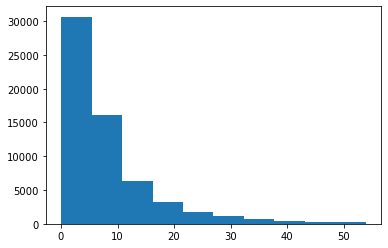

In [361]:
plt.hist(f_df['LOS_days']);

In [362]:
f_df['LOS_days'].describe()

count    61109.000000
mean         8.458117
std          8.253185
min          0.050000
25%          3.250694
50%          5.402778
75%         10.197917
max         53.870833
Name: LOS_days, dtype: float64

## Convert LOS_days to Categorical

In [363]:
# Calculate Tertiles

q1 = f_df['LOS_days'].quantile(q=(1/3))
q2 = f_df['LOS_days'].quantile(q=(2/3))
print(q1)
print(q2)

3.9493364197530854
8.041435185185177


In [364]:
# bin the LOS_days var

LOS = f_df['LOS_days']
m = max(LOS)

bins = [0, 3.9493364197530854, 8.041435185185177, m]
labels=[0, 1, 2]

# 0 - Low/Short Length of Stay
# 1 - Medium Length of Stay
# 2 - High/Long Length of Stay

f_df['LOS_days'] = pd.cut(LOS, bins=bins, labels=labels, include_lowest=True)

In [365]:
f_df['LOS_days'].value_counts()

0    20370
2    20370
1    20369
Name: LOS_days, dtype: int64